In [1]:
import cv2
from anime_face_detector import create_detector
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

In [2]:
detector = create_detector('yolov3', device='cpu')

loading model...
load checkpoint from local path: C:/Users/jhlee/.cache/torch/hub/checkpoints/mmpose_anime-face_hrnetv2.pth
load checkpoint from local path: C:/Users/jhlee/.cache/torch/hub/checkpoints/mmdet_anime-face_yolov3.pth


In [24]:
img = cv2.imread('test.jpg')
preds = detector(img)

In [29]:

image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(image)
# for face in preds:
#     draw.rectangle((face['bbox'][0], face['bbox'][1], face['bbox'][2], face['bbox'][3]), outline=(255, 0, 0), width=5)
#     x = face['bbox'][0]
#     y = face['bbox'][1]
#     for i, point in enumerate(face['keypoints']):
#         # draw.ellipse((point[0]-2, point[1]-2, point[0]+2, point[1]+2), fill=(255, 0, 0))
#         draw.text((point[0], point[1]), str(i), font=ImageFont.truetype('arial.ttf', 10), fill=(255, 0, 0))

for face in preds:
    points = face['keypoints']
    color = image.getpixel((points[27][0], points[27][1]+5))
    draw.polygon((
        (points[0][0], points[0][1]),
        (points[1][0], points[1][1]),
        (points[2][0], points[2][1]),
        (points[3][0], points[4][1]),
        (points[4][0], points[4][1]),
        (points[10][0], points[10][1]),
        (points[9][0], points[9][1]),
        (points[8][0], points[8][1]),
        (points[7][0], points[7][1]),
        (points[6][0], points[6][1]),
        (points[5][0], points[5][1])
    ), fill=color)

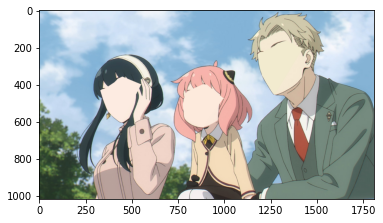

In [30]:
plt.imshow(np.asarray(image))
image.save('result.png')